In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'data/test.csv'
path2 = "data/train.csv"

train = pd.read_csv(path2)

test = pd.read_csv(path)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.Ticket.nunique()

681

In [5]:
from matplotlib import pyplot as plt
import seaborn as sb

pclass_survive = train.groupby(['Survived', 'Pclass']).Sex.count().reset_index()

pclass = pclass_survive.pivot(index='Survived', columns='Pclass', values='Sex')

embarked_survived = train.groupby(['Survived', "Embarked"]).PassengerId.count().reset_index()

embarked = embarked_survived.pivot(index='Survived', columns='Embarked', values='PassengerId')

pclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Pclass'>

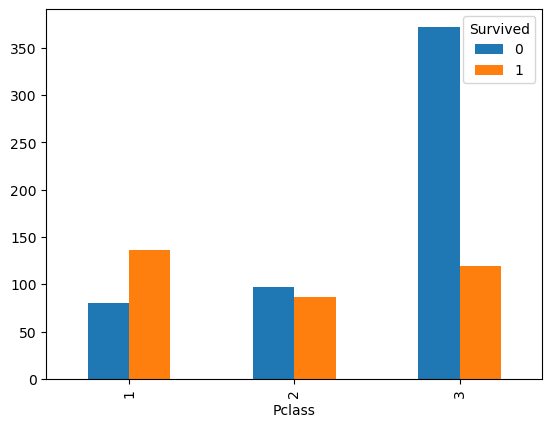

In [6]:
# plotting
%matplotlib inline

# fig, ax = plt.subplots()

pclass.T.plot(kind='bar')


* Basic Machine Learning

In [7]:
# copy the data
train_df = train.copy()

# Drop cabin column 
train_df.drop(columns=['Cabin', "Ticket", "Name"], inplace=True)
# rename a column name
train_df.rename(columns={'Sex': "Gender"}, inplace=True)

# replace some categorical variable to numeric
train_df.replace(["male", "female", 'S', "C", "Q"], [1, 0, 1, 2, 3], inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,0,38.0,1,0,71.2833,2.0
2,3,1,3,0,26.0,0,0,7.9250,1.0
3,4,1,1,0,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


In [8]:
from sklearn.impute import SimpleImputer as SI

# fill in missing values
embarked = SI(strategy='most_frequent')
age = SI(strategy='mean')

# fit and transform the embarked data
train_df.Embarked = embarked.fit_transform(train_df[['Embarked']])

# fit and transform age
transformed = age.fit_transform(train_df[['Age']])
train_df['Age'] = np.round(transformed)
train_df.Age.isna().any()

False

* Looks like it's not a regression problem but rather a classification problem 

In [9]:
# trying out models
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import  SVC
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.metrics import mean_absolute_error as Mae

x = train_df.drop(columns=['Survived', "PassengerId"])
y = train_df['Survived']

xtr, xte, ytr, yte = tts(x, y, test_size=.3)

def run_model(model, xin=xtr, xval=xte, yin=ytr, yval=yte):
    '''This function runs models, there are already some default values for xin, xval, yin, yval'''
    Model = model
    Model.fit(xin, yin)
    prediction = Model.predict(xval)
    mae = Mae(yval, prediction)
    return mae

# Random forest

m1 = run_model(RFC(n_estimators=100, random_state=0, criterion='entropy', max_depth=7))
m2 = run_model(DTC(max_leaf_nodes=100, random_state=0, criterion='entropy'))
m3 = run_model(KNC(n_neighbors=5))
m4 = run_model(SVC(gamma='auto', random_state=0))
m5  = run_model(MLPC(activation='relu', batch_size=150, solver='adam', learning_rate='adaptive', learning_rate_init=0.001))
print(m1, m2, m3, m4, m5)

0.20149253731343283 0.22014925373134328 0.34701492537313433 0.3694029850746269 0.20522388059701493


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
from sklearn.preprocessing import MinMaxScaler
# trying model 1
final = test.copy()
final.drop(columns=["Cabin", "Ticket", 'Name', "PassengerId"], inplace=True)
# null columns: Age, Fare
final.replace(["male", "female", 'S', "C", "Q"], [1, 0, 1, 2, 3], inplace=True)
final.rename(columns={'Sex': "Gender"}, inplace=True)

# normalize
norm = MinMaxScaler()
final

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,1
414,1,0,39.0,0,0,108.9000,2
415,3,1,38.5,0,0,7.2500,1
416,3,1,NaN,0,0,8.0500,1


In [12]:
# imputations
im_age = age.fit_transform(final[["Age"]])
im_fare = age.fit_transform(final[['Fare']])
final["Age"] = np.round(im_age)
final["Fare"] = np.round(im_fare)
final["Fare"] = norm.fit_transform(np.array(final.Fare).reshape(-1, 1))


# model 1
fmodel = RFC(n_estimators=100, random_state=0, criterion='entropy', max_depth=7)
fmodel.fit(x, y)

preds = fmodel.predict(final)



In [13]:

# model 2
fmodel02 = DTC(max_leaf_nodes=100, criterion='entropy', random_state=0)
fmodel02.fit(x, y)
preds02 = fmodel02.predict(final)

result = pd.DataFrame({'PassengerId': test.PassengerId,
                       "Survived": preds02})

# result.to_csv("submit_dtc.csv", index=False)

In [14]:
# model 3
model = MLPC(activation='relu', batch_size=150, solver='adam', learning_rate='adaptive')
model.fit(x, y)
preds03 = model.predict(final)


result2 = pd.DataFrame({'PassengerId': test.PassengerId,
                       "Survived": preds03})

# result2.to_csv("submit_mlpc.csv", index=False)

In [15]:
# model4
model4 = KNC()
model4.fit(x, y)
preds4 = model4.predict(final)


result2 = pd.DataFrame({'PassengerId': test.PassengerId,
                       "Survived": preds4})

# result2.to_csv("submit_knc.csv", index=False)

In [16]:
from sklearn.linear_model import SGDClassifier as SGDC

model5 = SGDC(loss='squared_error', max_iter=100, random_state=0)
model5.fit(x, y)
ans = model5.predict(final)

result2 = pd.DataFrame({'PassengerId': test.PassengerId,
                       "Survived": ans})

# result2.to_csv("submit_sgdc.csv", index=False)

* Internidiate Machine Learning

In [17]:
# Bismillah
from sklearn.compose import ColumnTransformer as CT, make_column_selector as mks
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as II
from sklearn.preprocessing import OneHotEncoder as OHE, StandardScaler
from xgboost import XGBClassifier as XGBC

# Data
training = train.copy()
training.info()
testing = test.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# First let's start with a simple pipeline of the best model

# Selecting columns
drop = ["Cabin", "Ticket", 'Name', "PassengerId"]
x_fea = training.drop(drop + ['Survived'], axis=1)
y_fea = training["Survived"]

# splitting the data
xtr, xte, ytr, yte = tts(x_fea, y_fea, test_size=.2)

# imputers
simple = SI(strategy='most_frequent')
imputer = II(max_iter=100, random_state=0)

training['Embarked'] = simple.fit_transform(training[['Embarked']])

# columns
processor = CT(transformers=[("Categorical", OHE(handle_unknown='ignore'), mks(dtype_include='object')),
                             ("Numerical", imputer, ["Age"]),
                             ("Scaler", StandardScaler(), mks(dtype_exclude='object'))])

# pipeline
mypipe = Pipeline(steps=[("Preprocessing", processor),
                         ('model', XGBC(n_estimator=500, learning_rate=0.01))])


# run_model(mypipe, xin=xtr, xval=ytr, yin=xte, yval=yte)
mypipe.fit(xtr, ytr)

pipe_preds = mypipe.predict(xte)
Mae(yte, pipe_preds)


[20:26:07] WARNING: D:\bld\xgboost-split_1665562966173\work\src\learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.20670391061452514

In [19]:
testing = testing.drop(drop, axis=1)

In [20]:
mypipe.fit(x_fea, y_fea)
PipePreds = mypipe.predict(testing)

data = pd.DataFrame({"PassengerId": test.PassengerId,
                     "Survived": PipePreds})

data.to_csv('Pipeline_sb.csv', index=False)


[20:26:09] WARNING: D:\bld\xgboost-split_1665562966173\work\src\learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




* Neural Networks

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

# drop noisy data
x.drop('Fare', axis=1, inplace=True)
final.drop('Fare', axis=1, inplace=True)

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages

In [22]:
# splitting data for validation
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.2)

# input shape
inpshape = x.shape[1]

# callback
call = keras.callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

nnmodel = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=[inpshape]),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])
# I'll be back to fix it!!
nnmodel.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = nnmodel.fit(xtrain, ytrain,
                    validation_data=(xtest, ytest),
                    batch_size=512,
                    epochs=1000,
                    callbacks=[call])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 712 samples, validate on 179 samples
Epoch 1/1000
712/712 [==============================] - 8s 11ms/sample - loss: 0.7900 - binary_accuracy: 0.5688 - val_loss: 0.7880 - val_binary_accuracy: 0.5978
Epoch 2/1000
712/712 [==============================] - 0s 94us/sample - loss: 0.6282 - binary_accuracy: 0.7051 - val_loss: 0.7075 - val_binary_accuracy: 0.5978
Epoch 3/1000
712/712 [==============================] - 0s 94us/sample - loss: 0.5743 - binary_accuracy: 0.7149 - val_loss: 0.6795 - val_binary_accuracy: 0.5922
Epoch 4/1000
712/712 [==============================] - 0s 94us/sample - loss: 0.5359 - binary_accuracy: 0.7528 - val_loss: 0.6662 - val_binary_accuracy: 0.5810
Epoch 5/1000
712/712 [==============================] - 0s 71us/sample - loss: 0.5100 - binary_acc

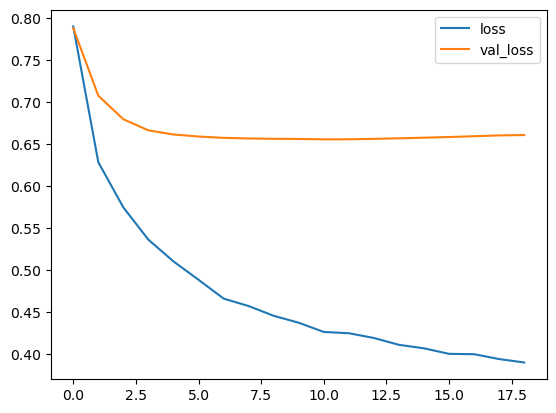

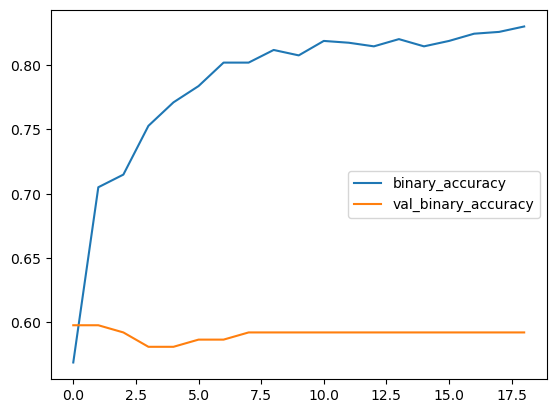

In [23]:

data = pd.DataFrame(history.history)
data[['loss', 'val_loss']].plot()
data[['binary_accuracy', 'val_binary_accuracy']].plot()
plt.show()

In [24]:
# perdiction
preds_nn = nnmodel.predict(final).astype(int)
# reshape it to a one dimensional array
reshaped = preds_nn.reshape(-1)

nnpreds = pd.DataFrame({"PassengerId": test.PassengerId,
    "Survived": reshaped})

nnpreds.to_csv("nn_submitions04.csv", index=False)


# Feature Engineering
* Explore data
* Mutual Infromation
* Making new features
* Clustering
* PCA(Unsupervised Machine Learning)
* Target Encoding(supervised Machine Learning)

In [25]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif as mic

df = train.copy()

df.drop('PassengerId', inplace=True, axis=1)

feature_num = df.shape[1]

df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* PassengerId: Ignore
* survived: we have to treat it as if  it were categorical.
* Plcass: same as "survived"
* Name: Let's see what we can get from the title
* Sex: Male or Female
* Age: age of individual
* SibSP: Siblings or spouse
* Parch: Parent or child
* Ticket: The ticket number
* Fare: Amount paid
* cabin: The cabin number
* embarked: Where the passenger embarked from

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [27]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
import re
# Turn Survived and Pclass into cat data
df['Survived'] = df.Survived.astype('object')
df['Pclass'] = df.Pclass.astype('object')

# Name Title
# using regex
compiler = re.compile(r"[a-zA-Z]+\.")

# Regular expression to find titles (e.g., Rev., Dr., etc.)
data = df.Name.apply(lambda x: str(compiler.findall(x)[0]))
data.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [29]:
df['Name'] = data
df.Name.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

In [87]:
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import iplot

# Create a bar chart
data = go.Bar(
            x=df.Name.unique(),
            y=df['Name'].value_counts()
)

# Create a layout, if you want to customize the chart
layout = go.Layout(
    title='Titles of passengers',
    xaxis=dict(title='Titles'),
    yaxis=dict(title='Frequency'),
)

# Create a figure with the data and layout
fig = go.Figure(data=data, layout=layout)

# Plot the figure
# pyo.plot(fig, filename='bar_chart.html', auto_open=False)
iplot(fig)

In [69]:
# Make a new column "Family" then work on tickets
df['Family'] = df.Parch + df.SibSp + 1

tickets = df.Ticket.apply(lambda x: "".join(re.findall(r'^[a-zA-z]', str(x))) )

tickets.replace({'': "N"}, inplace=True)

df['Ticket'] = tickets

In [ ]:
# Finally the Cabin feature

# Getting the first letter
cabin = df.Cabin.apply(lambda x: str(x)[0])

# print the unique values

cabin.value_counts()

df['Cabin'] = cabin
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,3,Mr.,male,22.0,1,0,A,7.2500,n,S,2
1,1,1,Mrs.,female,38.0,1,0,P,71.2833,C,C,2
2,1,3,Miss.,female,26.0,0,0,S,7.9250,n,S,1
3,1,1,Mrs.,female,35.0,1,0,N,53.1000,C,S,2
4,0,3,Mr.,male,35.0,0,0,N,8.0500,n,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Rev.,male,27.0,0,0,N,13.0000,n,S,1
887,1,1,Miss.,female,19.0,0,0,N,30.0000,B,S,1
888,0,3,Miss.,female,NaN,1,2,W,23.4500,n,S,4
889,1,1,Mr.,male,26.0,0,0,N,30.0000,C,C,1


In [77]:
# looks like "Age" still has some missing values
# so we have an imputer defined somewhere so let's just use it
filled_age = imputer.fit_transform(np.array(df.Age).reshape(-1, 1))

df['Age'] = np.round(filled_age, 1)

df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
count,891.0,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891,889,891.000000
unique,2.0,3.0,17,2,NaN,NaN,NaN,8,NaN,9,3,NaN
top,0.0,3.0,Mr.,male,NaN,NaN,NaN,N,NaN,n,S,NaN
freq,549.0,491.0,517,577,NaN,NaN,NaN,661,NaN,687,644,NaN
mean,NaN,NaN,NaN,NaN,29.699327,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.904602
std,NaN,NaN,NaN,NaN,13.001940,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.613459
min,NaN,NaN,NaN,NaN,0.400000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,29.700000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,2.000000


### Let's now compare the values and visualize

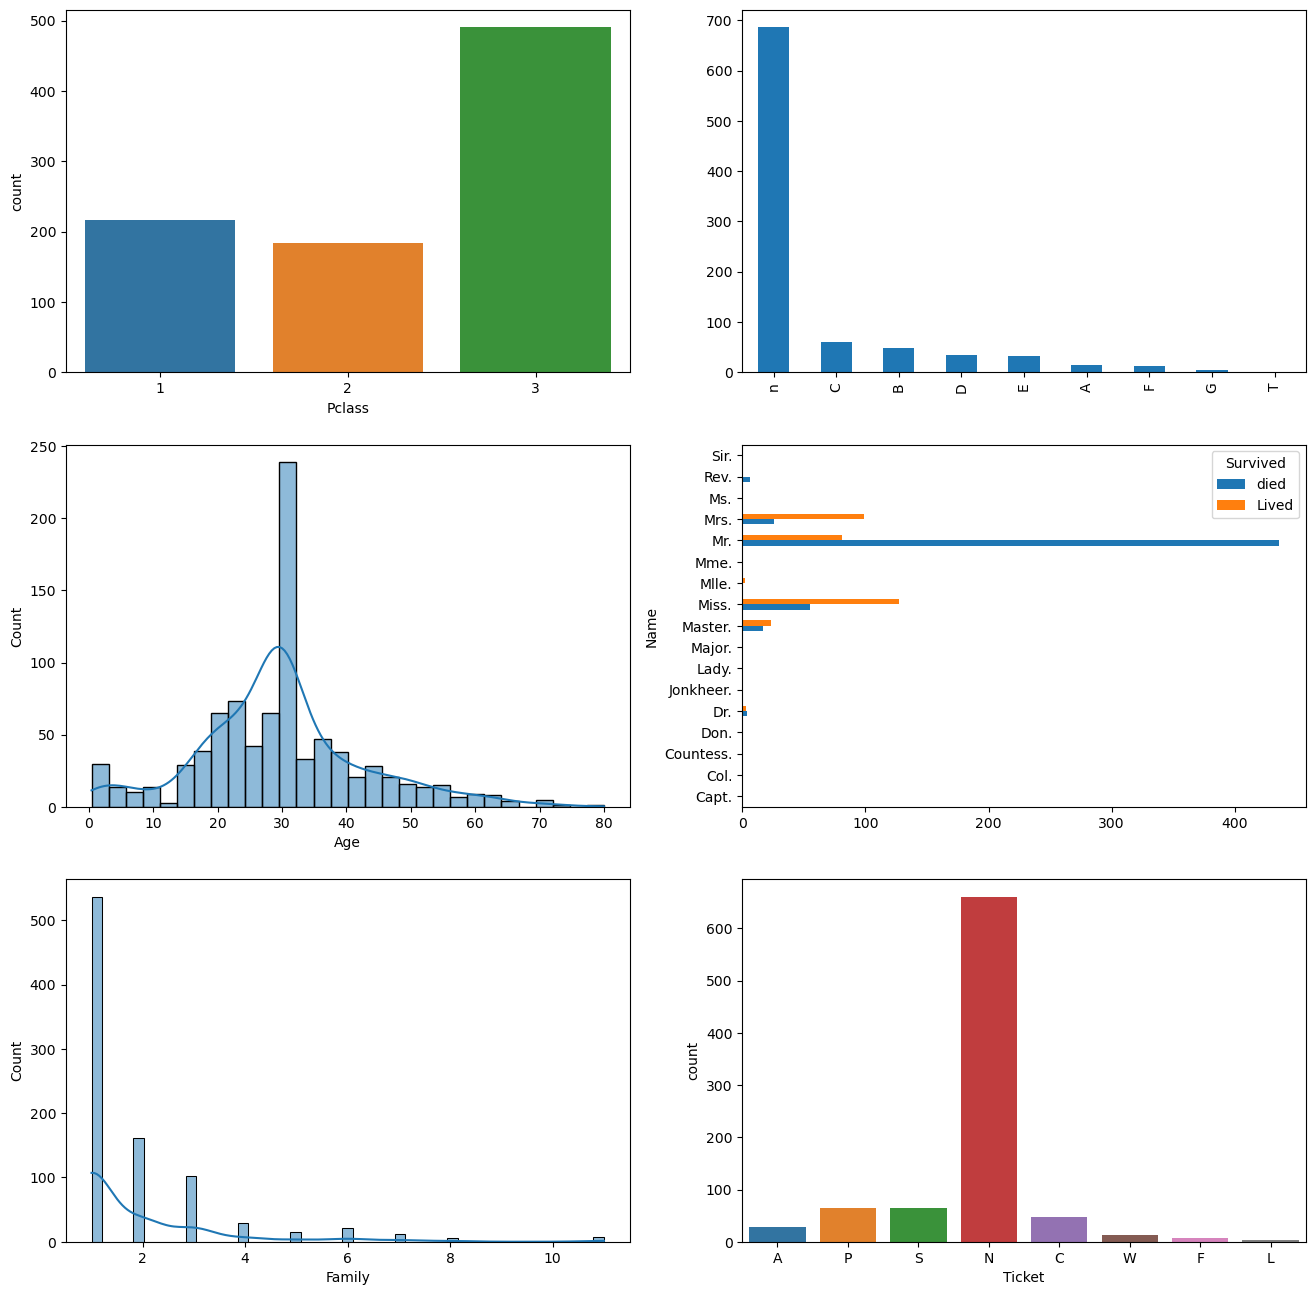

In [96]:
# Subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# pclass
sb.countplot(data=df, x="Pclass", ax=axes[0, 0])

# cabin col
df.Cabin.value_counts().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1])

# A histplot of age
sb.histplot(x=df.Age, ax=axes[1, 0], kde=True)

# Title: number of people that survived with respect to title 
title_sur = df.pivot_table(index='Name', columns='Survived', aggfunc='size', fill_value=0)

title_sur = title_sur.rename(columns={0: "died", 1:"Lived"})

title_sur.plot(kind='barh', ax=axes[1, 1])

# a boxplot of Family 
sb.histplot(x=df.Family, ax=axes[2, 0], kde=True)

# The ticket plot
sb.countplot(x=df.Ticket, ax=axes[2, 1])

plt.show()